In [38]:
import src.analysis as analysis
from src.fetch_data.table_builders import SeatgeekData
import matplotlib.pyplot as plt
import env
from src.scalpyr import ScalpyrPro
from sqlalchemy import create_engine

In [39]:
engine = create_engine(env.PLANETSCALE_URL)
client = ScalpyrPro(env.SEATGEEK_CLIENT_ID)
data_db = analysis.DataPlotter.from_db(engine, client)
data_api = analysis.DataPlotter.from_api(client)

getting events from database 2023-06-14 21:15:43.282699
building seatgeek data 2023-06-14 21:15:50.682510
getting events from seatgeek 2023-06-14 21:15:50.868298
building seatgeek data 2023-06-14 21:15:51.531455


In [40]:
data_db.performer.head(10)
res = client.get_events({'performers.slug': 'chris-stapleton', 'per_page': 100})
res1 = client.get_performers({'slug': 'chris-stapleton'})

In [41]:
from src.fetch_data import SlugReq

data_db.get_stats_by_slug(SlugReq(slug={'performer': 'taylor-swift'}))

,event_id,average_price,lowest_price,highest_price,median_price,listing_count,visible_listing_count,utc_read_time
0,5858574,6421.0,2034.0,26730.0,5582.0,165.0,142.0,2023-06-08 19:32:00
1,5862048,6988.0,2011.0,35993.0,5433.0,144.0,126.0,2023-06-08 19:32:00
4,5858572,6159.0,1867.0,26730.0,5405.0,115.0,92.0,2023-06-08 19:32:00
5,5868232,6020.0,1668.0,22605.0,5654.0,93.0,84.0,2023-06-08 19:32:00
6,5858567,7028.0,2026.0,26730.0,5655.0,116.0,99.0,2023-06-08 19:32:00
...,...,...,...,...,...,...,...,...
22428,5862050,5516.0,1586.0,25159.0,4287.0,308.0,264.0,2023-06-15 00:00:00
22431,5858576,5501.0,1665.0,37357.0,4150.0,238.0,226.0,2023-06-15 00:00:00
22445,5858578,6185.0,1381.0,18895.0,5312.0,266.0,237.0,2023-06-15 00:00:00
22465,5868236,5507.0,1754.0,29385.0,4017.0,274.0,253.0,2023-06-15 00:00:00


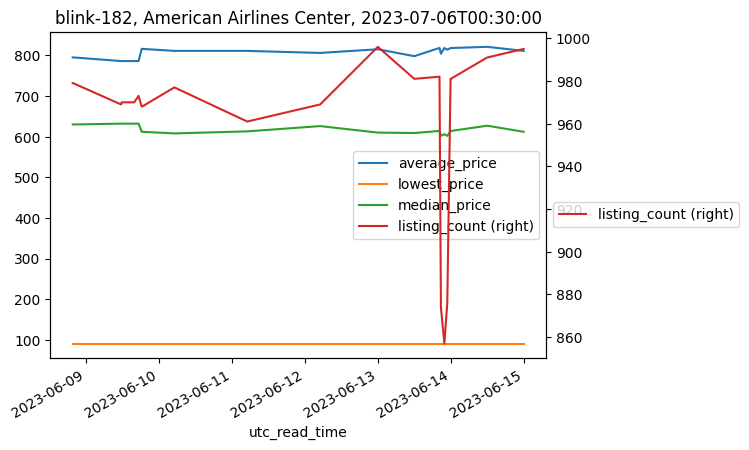

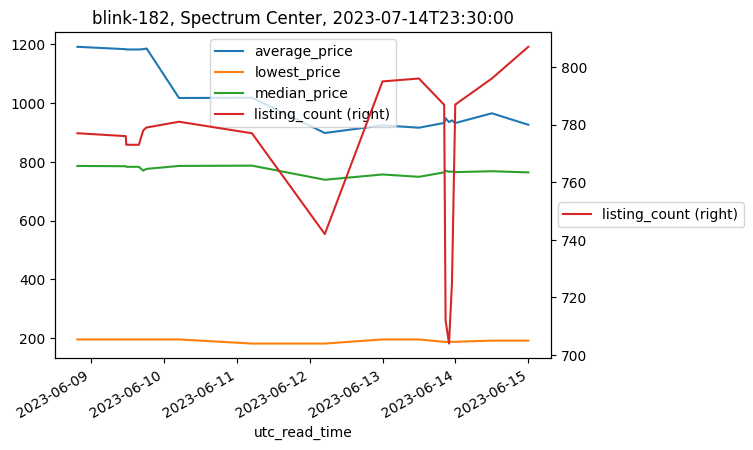

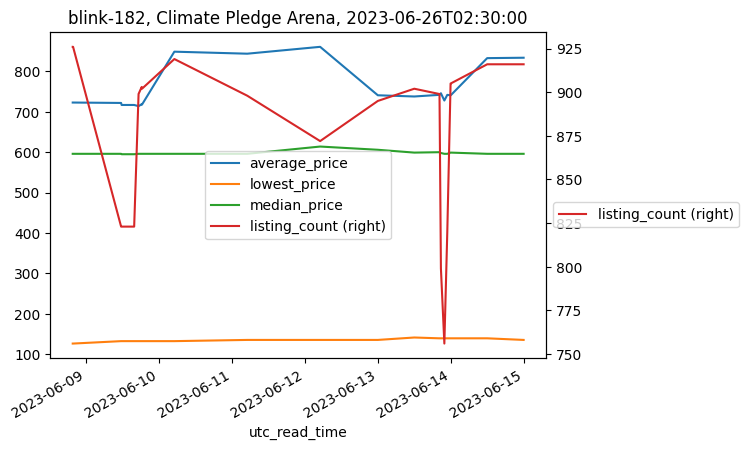

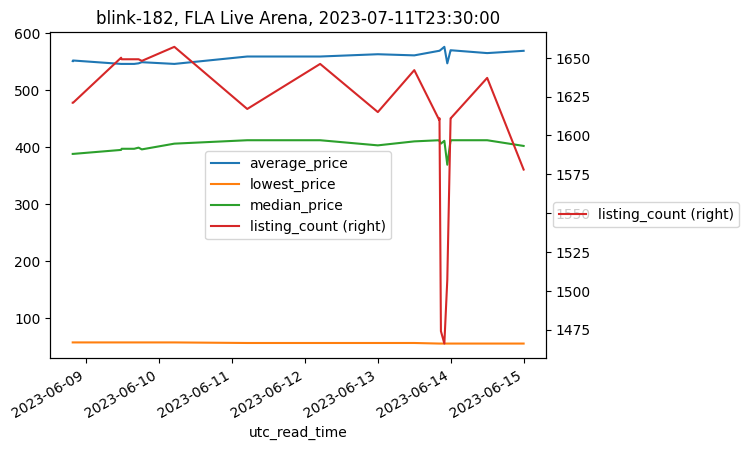

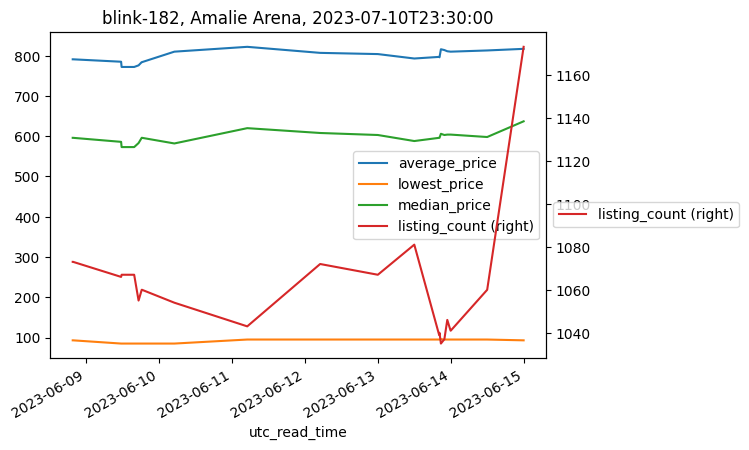

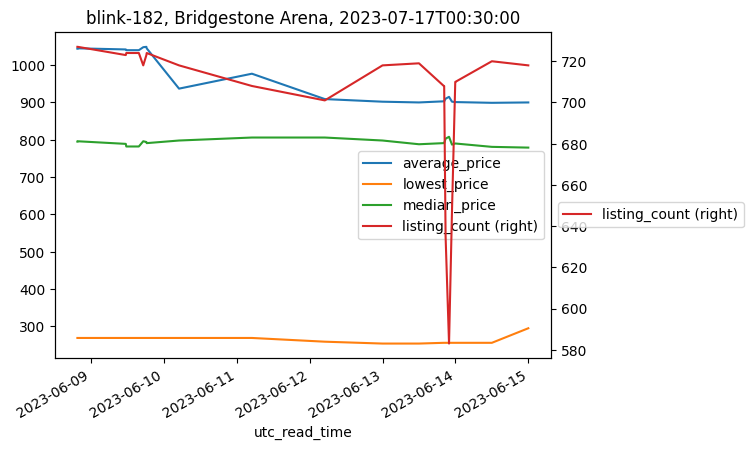

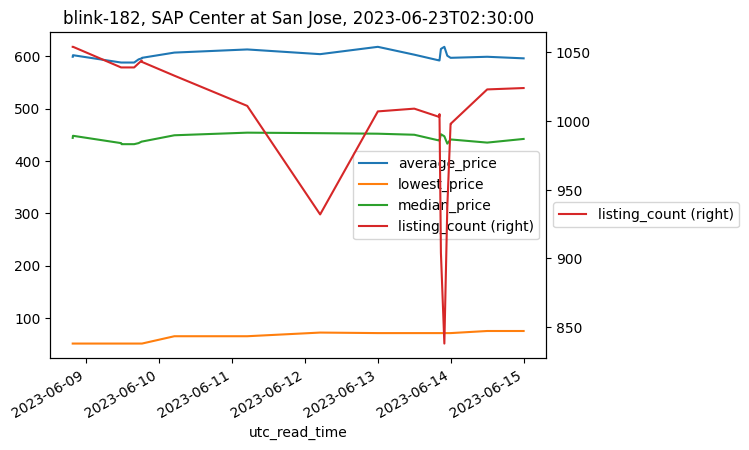

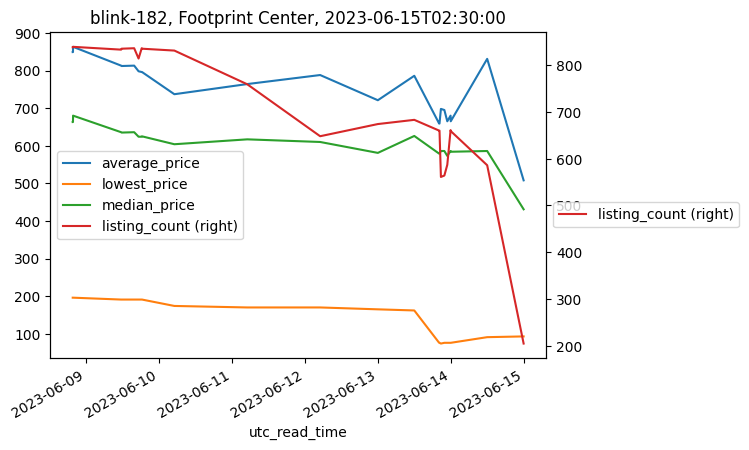

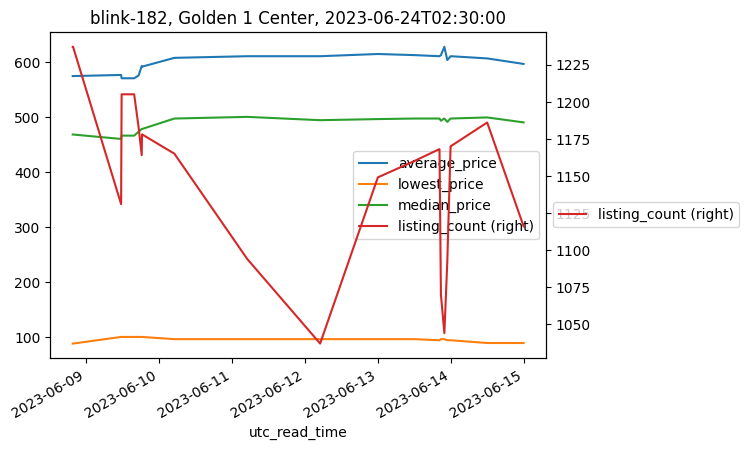

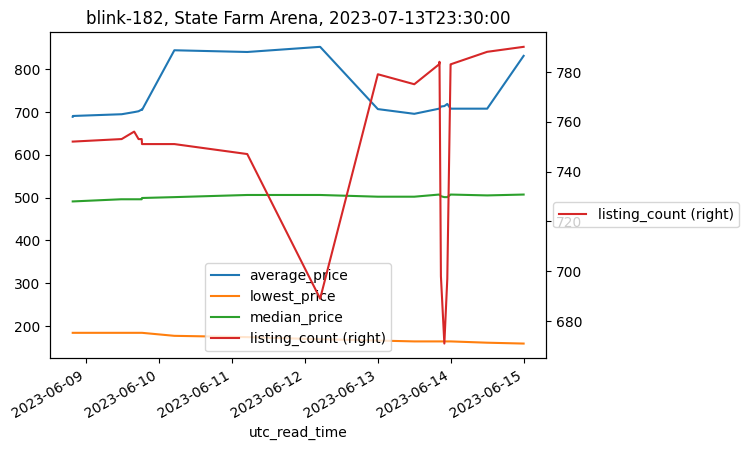

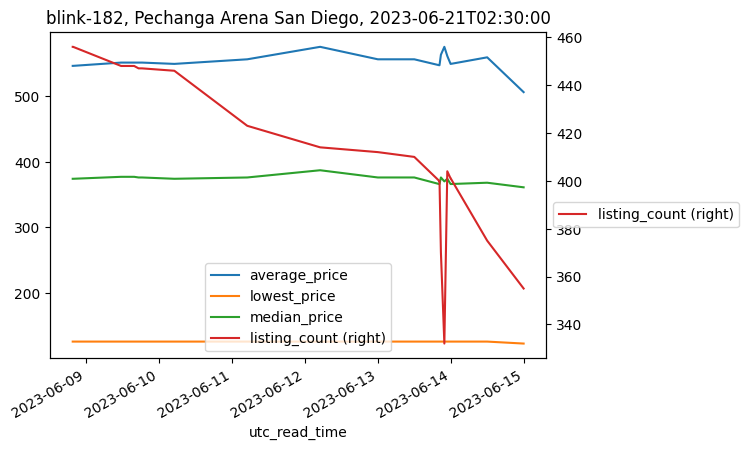

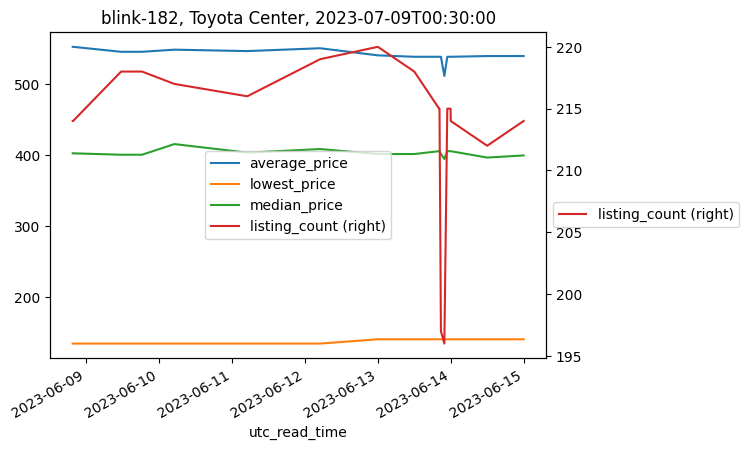

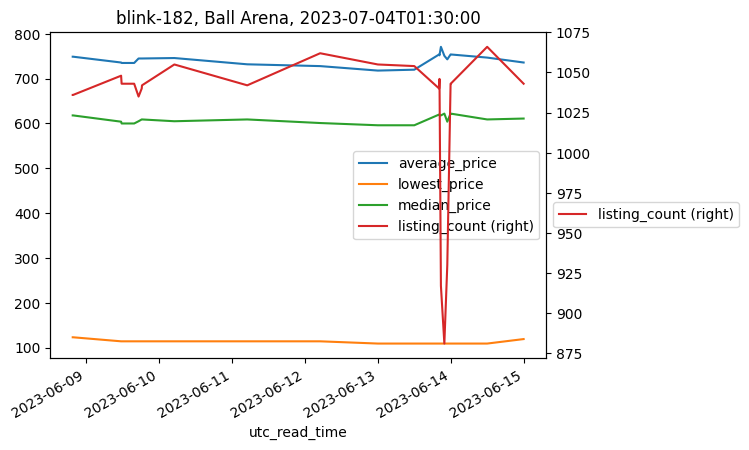

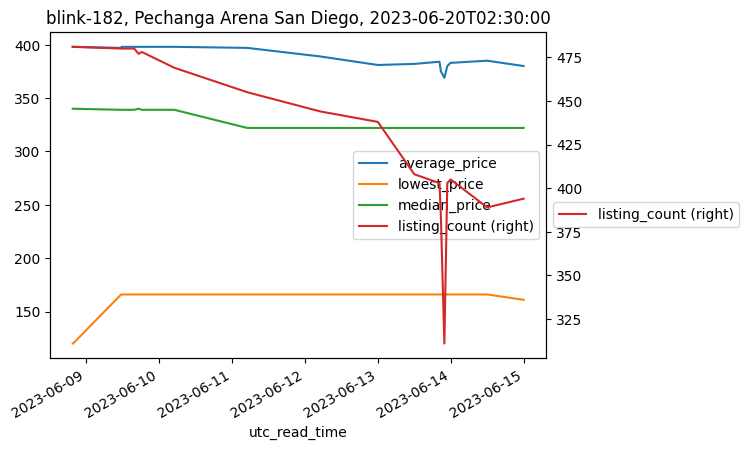

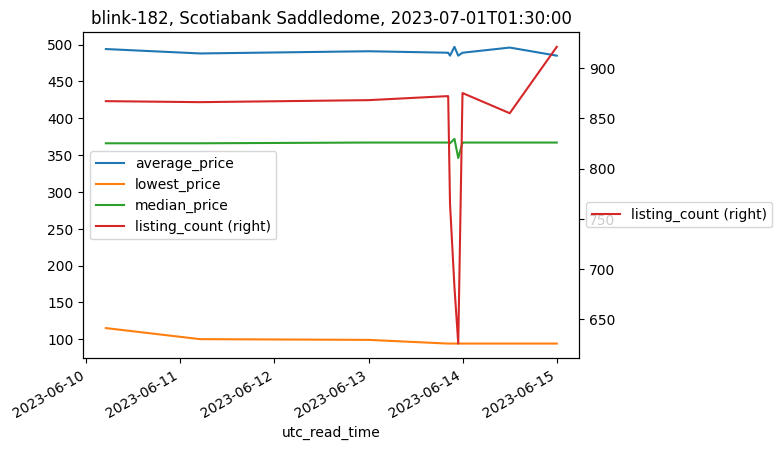

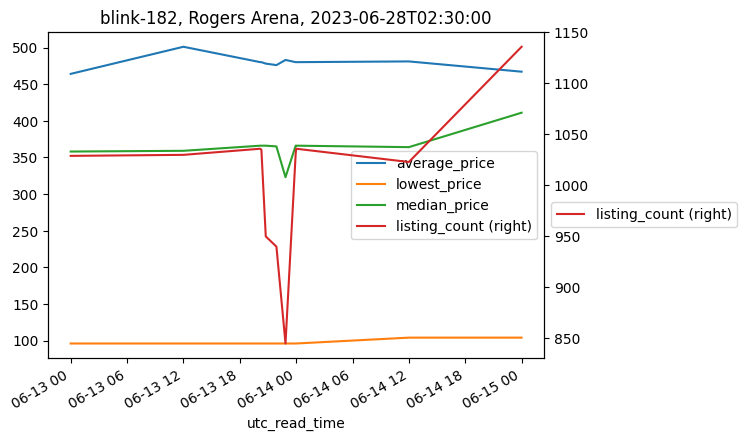

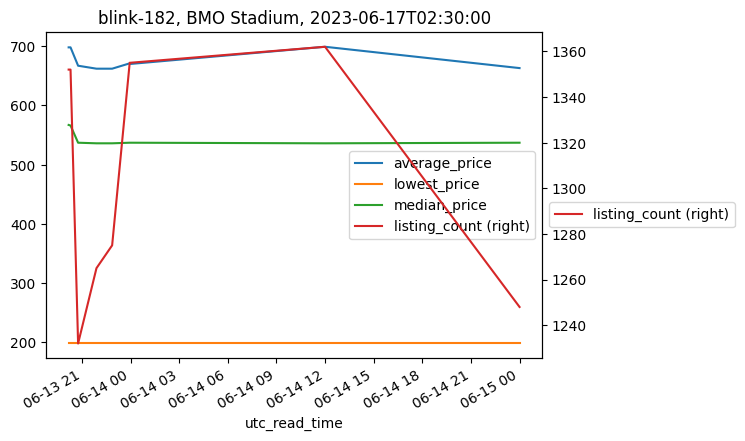

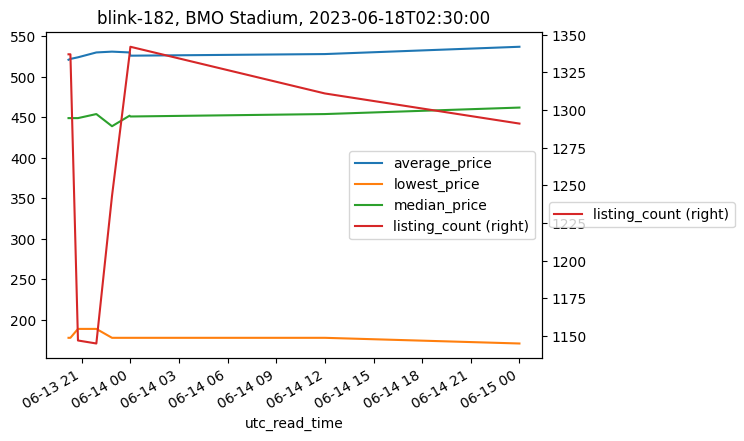

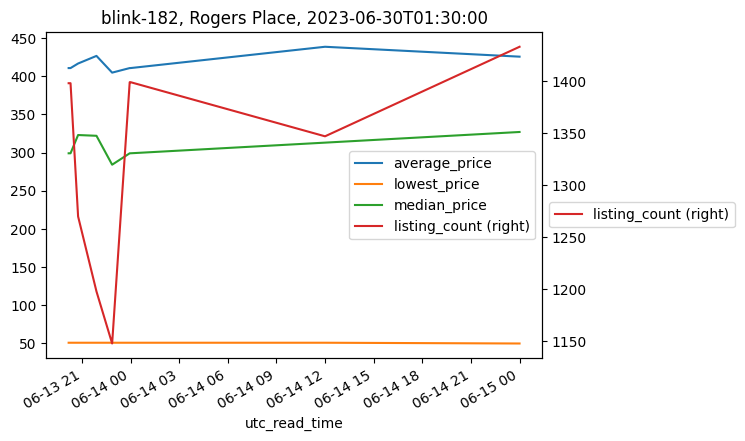

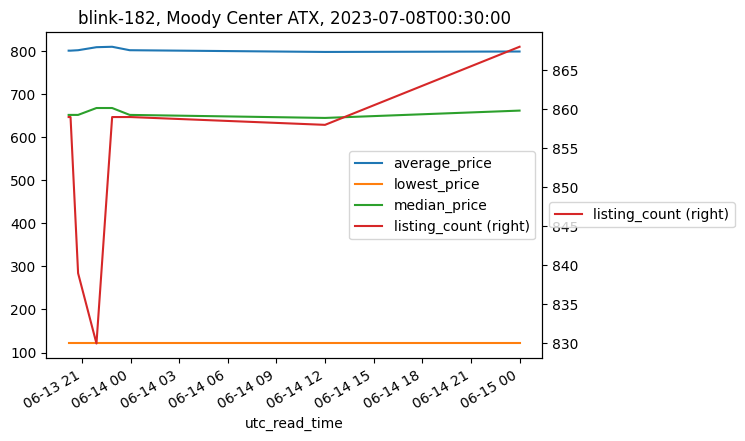

,event_id,venue_id,datetime_utc,announce_date,visible_at,performer_id
3,5838828,130,2023-06-15T02:30:00,2022-10-11T00:00:00,2023-04-18T00:48:55Z,41
25,5838830,432601,2023-06-17T02:30:00,2022-10-11T00:00:00,2023-04-18T00:48:55Z,41
47,5846154,432601,2023-06-18T02:30:00,2022-10-18T00:00:00,2023-04-18T00:49:51Z,41
56,5846156,4317,2023-06-20T02:30:00,2022-10-18T00:00:00,2023-04-18T00:49:51Z,41
60,5838832,4317,2023-06-21T02:30:00,2022-10-11T00:00:00,2023-04-18T00:48:55Z,41
68,5838834,157,2023-06-23T02:30:00,2022-10-11T00:00:00,2023-04-18T00:48:55Z,41
81,5838836,177304,2023-06-24T02:30:00,2022-10-11T00:00:00,2023-04-18T00:48:55Z,41
98,5838838,176,2023-06-26T02:30:00,2022-10-11T00:00:00,2023-04-18T00:48:55Z,41
113,5838840,2983,2023-06-28T02:30:00,2022-10-11T00:00:00,2023-04-18T00:48:55Z,41
130,5838842,75884,2023-06-30T01:30:00,2022-10-11T00:00:00,2023-04-18T00:48:55Z,41


In [44]:
data_db.plot_by_slug('blink-182')

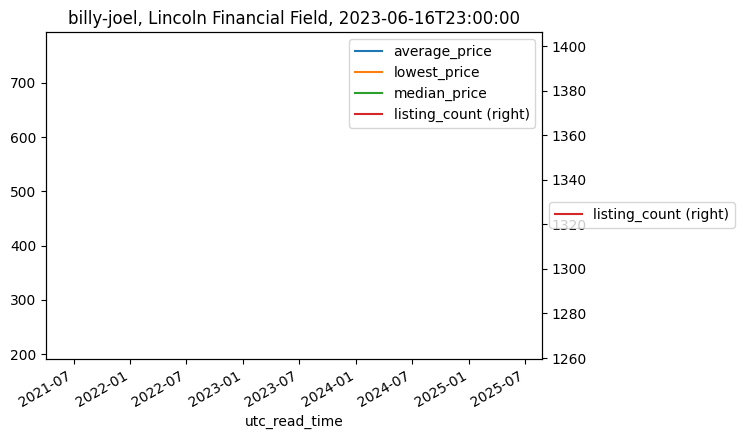

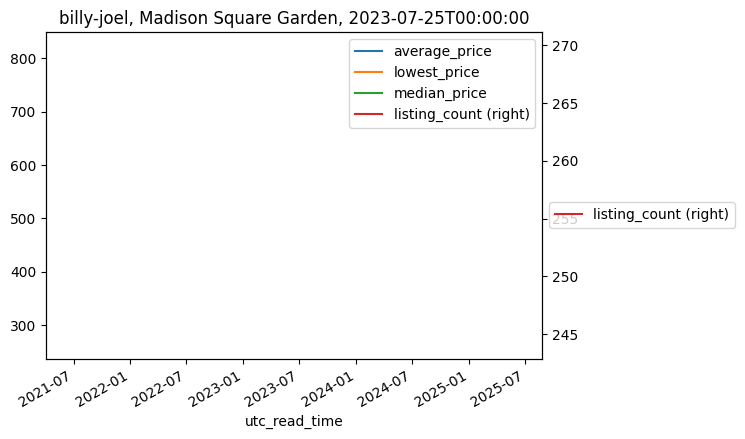

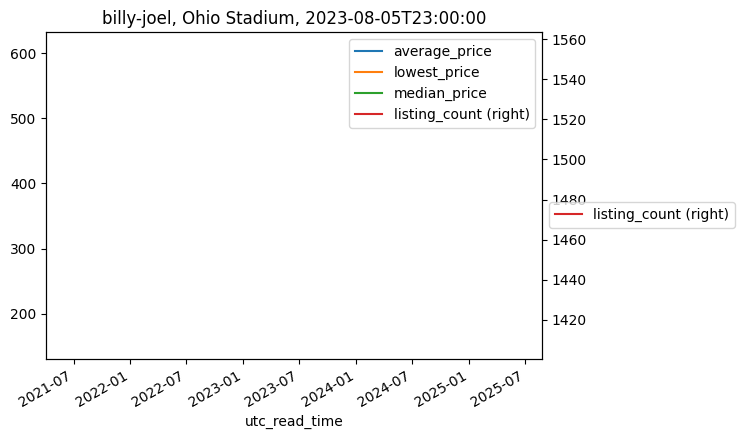

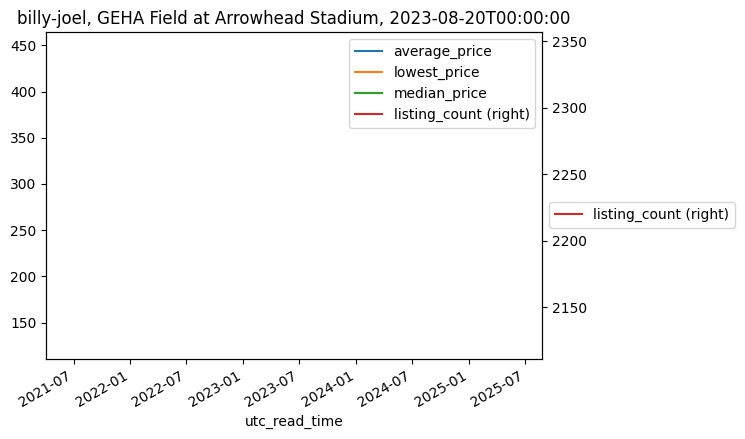

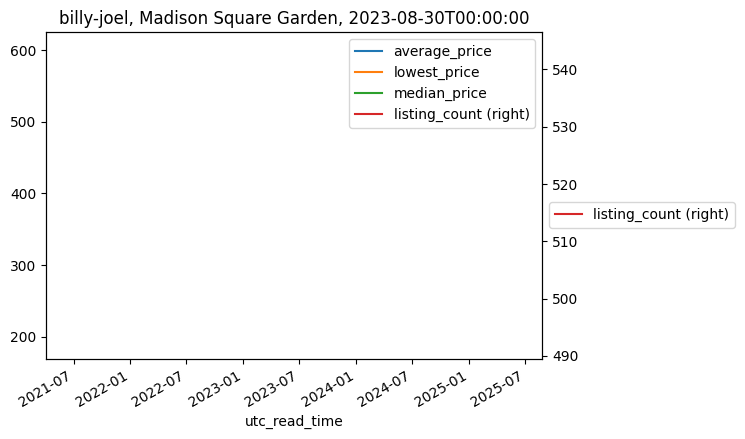

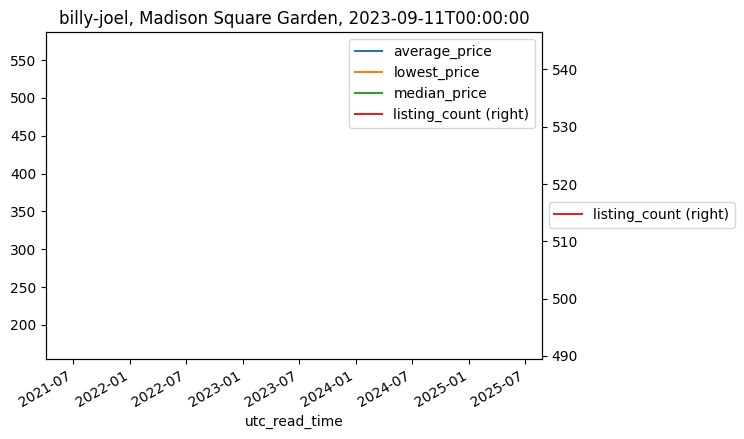

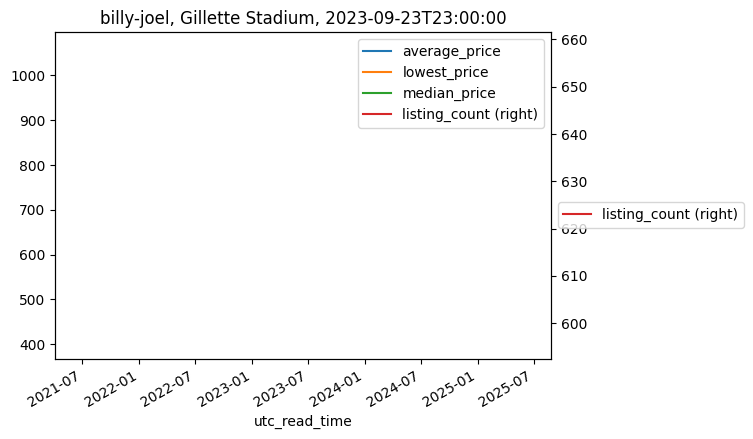

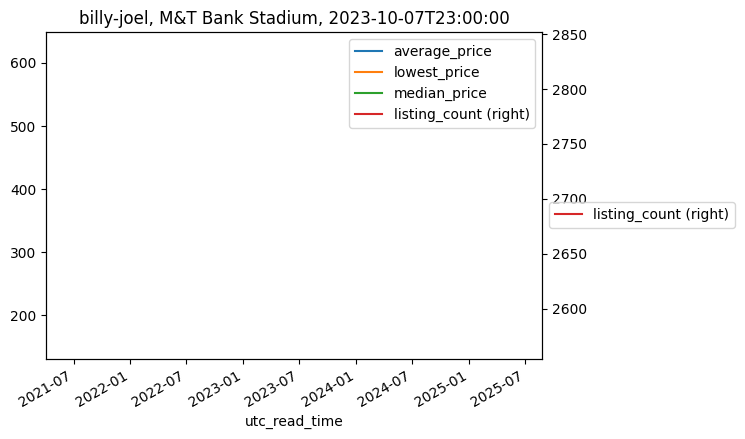

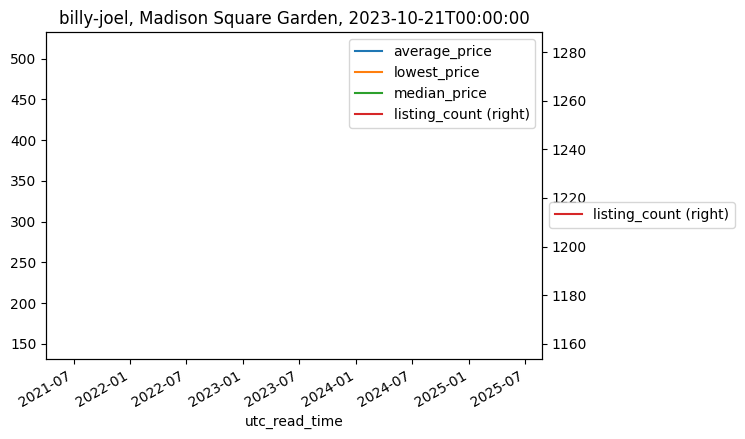

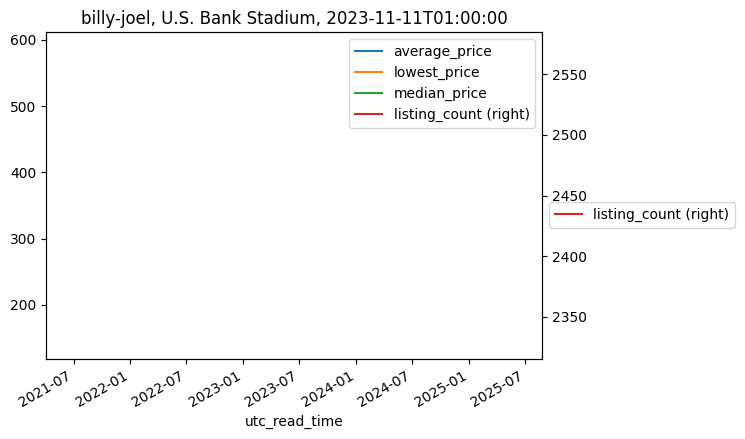

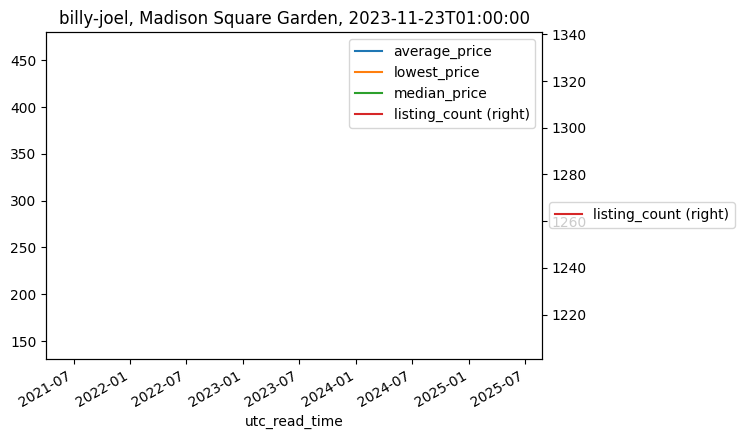

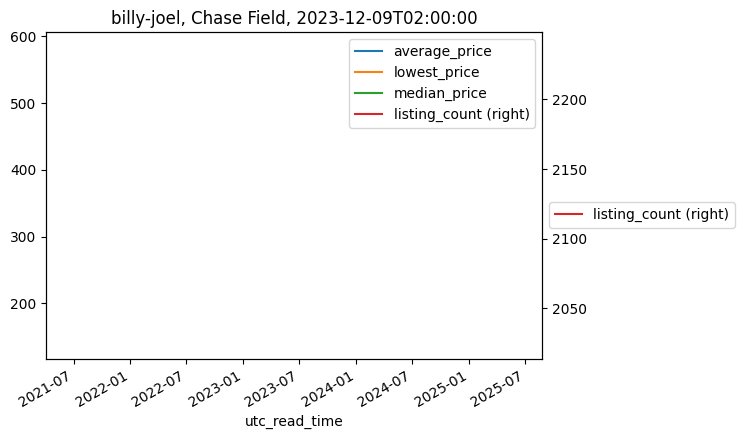

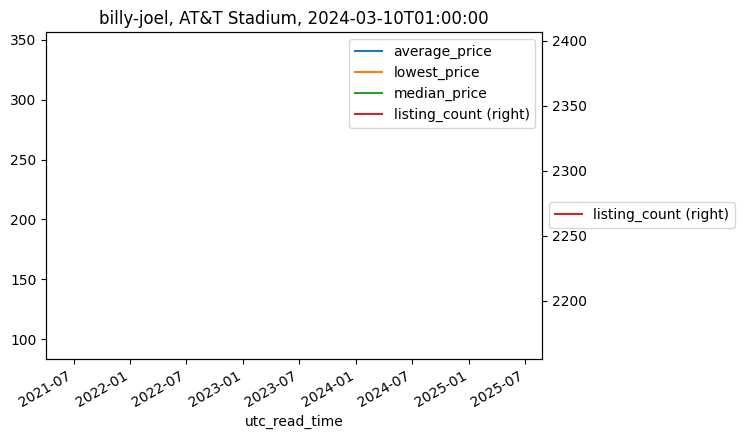

,event_id,venue_id,datetime_utc,announce_date,visible_at,performer_id
6,5892639,330,2023-06-16T23:00:00,2022-12-08T00:00:00,2023-04-18T00:55:38Z,303
184,5909299,93,2023-07-25T00:00:00,2023-01-06T00:00:00,2023-04-18T00:58:18Z,303
248,5868243,2739,2023-08-05T23:00:00,2022-11-11T00:00:00,2023-04-18T00:52:34Z,303
369,5875321,1128,2023-08-20T00:00:00,2022-11-19T00:00:00,2023-04-18T00:53:09Z,303
434,5934150,93,2023-08-30T00:00:00,2023-02-03T00:00:00,2023-04-18T01:03:01Z,303
505,5976408,93,2023-09-11T00:00:00,2023-03-23T00:00:00,2023-04-18T01:13:17Z,303
579,5892641,33,2023-09-23T23:00:00,2022-12-08T00:00:00,2023-04-18T00:55:38Z,303
664,5913601,1121,2023-10-07T23:00:00,2023-01-12T00:00:00,2023-04-18T00:59:03Z,303
729,6043877,93,2023-10-21T00:00:00,2023-06-01T00:00:00,2023-06-01T17:10:35Z,303
820,5909333,218451,2023-11-11T01:00:00,2023-01-06T00:00:00,2023-04-18T00:58:18Z,303
